In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, expon, uniform
import math

In [2]:
# Read the csv file
df = pd.read_csv('../PCS_TEST_DETERMINSTIC_19S2.csv')
df.head()

,Arrival no,Arrival time (sec),Base station,Call duration (sec),velocity (km/h)
0,1,0.000,18,76.134,125.934
1,2,0.068,7,159.056,95.511
2,3,0.559,6,179.465,127.757
3,4,0.625,14,163.108,134.311
4,5,1.345,2,95.054,112.272


In [3]:
# Chi-Square Test parameters
n = 10000
k = 100
p_j = 1/k

### 1. Inter Arrival Time

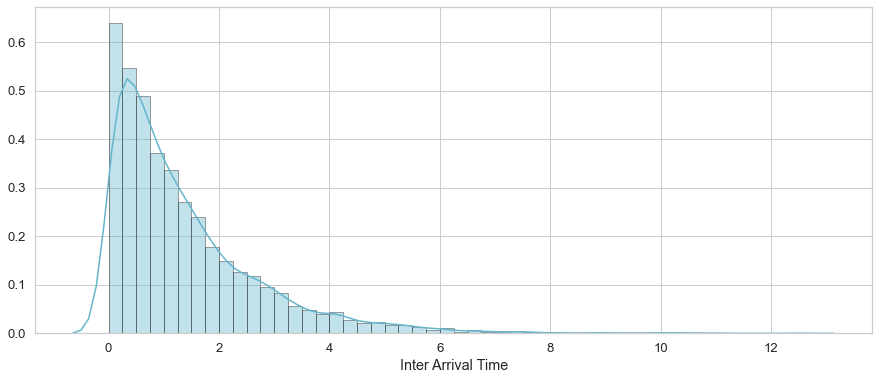

In [4]:
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

arrival_time = pd.concat([pd.Series([0.0]), df['Arrival time (sec)']], ignore_index=True)
inter_arrival_time = pd.Series([arrival_time[i+1] - arrival_time[i] for i in range(10000)], name='Inter Arrival Time')

sns.distplot(inter_arrival_time, color='c', hist_kws=dict(ec="k"), label='Inter Arrival Time')
plt.show()

In [5]:
print("Minimum: {:f}".format(inter_arrival_time.min()))
print("Maximum: {:f}".format(inter_arrival_time.max()))
print("Mean: {:f}".format(inter_arrival_time.mean()))
print("Unbiased Variance: {:f}".format(inter_arrival_time.var(ddof=1)))
print("Biased Variance: {:f}".format(inter_arrival_time.var(ddof=0)))

Minimum: 0.000000
Maximum: 12.499000
Mean: 1.369680
Unbiased Variance: 1.806139
Biased Variance: 1.805959


#### Chi-Square Test for Inter Arrival Time (IAT)

For n = 10000, choose k = 100

In [6]:
iat_class_interval = [0]
iat_mean = inter_arrival_time.mean()

for i in range(1, k):
    iat_class_interval.append(expon.ppf(i*p_j, scale=iat_mean))
    
iat_class_interval.append(math.inf)

In [7]:
iat_test_statistic = 0
for i in range(k):
    N_j = len(inter_arrival_time[(iat_class_interval[i] <= inter_arrival_time) & (inter_arrival_time < iat_class_interval[i+1])])
    iat_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print(iat_test_statistic)

113.54


### 2. Base Station

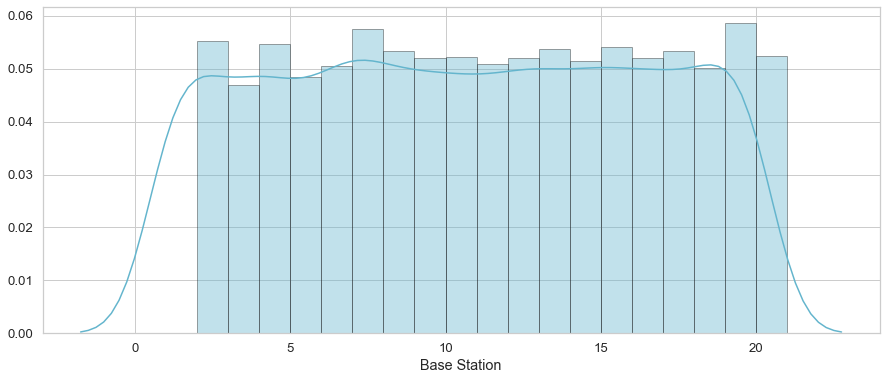

In [20]:
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

base_station = df['Base station '].rename('Base Station')

sns.distplot(base_station, color='c', bins=np.arange(2,22), hist_kws=dict(ec="k"))
# sns.countplot(base_station, color='c')
plt.show()

In [9]:
print("Minimum: {:d}".format(base_station.min()))
print("Maximum: {:d}".format(base_station.max()))

Minimum: 1
Maximum: 20


#### Chi-Square Test for Base Station

For n = 10000, choose k = 100

In [10]:
station_class_interval = [0]
station_min = base_station.min()
station_max = base_station.max()

for i in range(1, k):
    station_class_interval.append(uniform.ppf(i*p_j, loc=station_min, scale=station_max-station_min))
    
station_class_interval.append(math.inf)

In [11]:
station_test_statistic = 0
for i in range(k):
    N_j = len(base_station[(station_class_interval[i] <= base_station) & (base_station < station_class_interval[i+1])])
    station_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print(station_test_statistic)

40128.28


### 3.  Call Duration

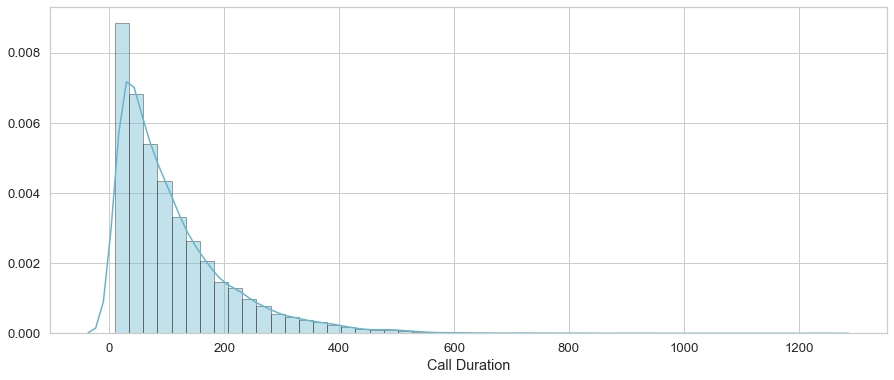

In [12]:
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

call_duration = df['Call duration (sec)'].rename('Call Duration')

sns.distplot(call_duration, color='c', hist_kws=dict(ec="k"))
plt.show()

In [13]:
print("Minimum: {:f}".format(call_duration.min()))
print("Maximum: {:f}".format(call_duration.max()))
print("Mean: {:f}".format(call_duration.mean()))
print("Unbiased Variance: {:f}".format(call_duration.var(ddof=1)))
print("Biased Variance: {:f}".format(call_duration.var(ddof=0)))

Minimum: 10.004000
Maximum: 1239.836000
Mean: 109.835897
Unbiased Variance: 9828.524385
Biased Variance: 9827.541533


#### Chi-Square Test for Call Duration

For n = 10000, choose k = 100

In [14]:
duration_class_interval = [0]
duration_mean = call_duration.mean()

for i in range(1, k):
    duration_class_interval.append(expon.ppf(i*p_j, scale=duration_mean))
    
duration_class_interval.append(math.inf)

In [15]:
duration_test_statistic = 0
for i in range(k):
    N_j = len(call_duration[(duration_class_interval[i] <= call_duration) & (call_duration < duration_class_interval[i+1])])
    duration_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print(duration_test_statistic)

1110.56


### 4. Car Speed

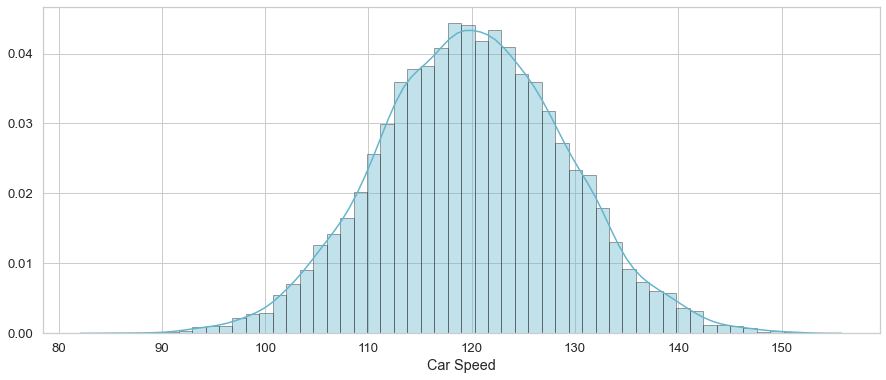

In [16]:
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

car_speed = df['velocity (km/h)'].rename('Car Speed')

sns.distplot(car_speed, color='c', hist_kws=dict(ec="k"))
plt.show()

In [17]:
print("Minimum: {:f}".format(car_speed.min()))
print("Maximum: {:f}".format(car_speed.max()))
print("Mean: {:f}".format(car_speed.mean()))
print("Unbiased Variance: {:f}".format(car_speed.var(ddof=1)))
print("Biased Variance: {:f}".format(car_speed.var(ddof=0)))

Minimum: 86.423000
Maximum: 151.501000
Mean: 120.072095
Unbiased Variance: 81.343364
Biased Variance: 81.335230


#### Chi-Square Test for Car Speed

For n = 10000, choose k = 100

In [18]:
speed_class_interval = [0]
speed_mean = car_speed.mean()
speed_std = math.sqrt(car_speed.var(ddof=0))

for i in range(1, k):
    speed_class_interval.append(norm.ppf(i*p_j, loc=speed_mean, scale=speed_std))
    
speed_class_interval.append(math.inf)

In [19]:
speed_test_statistic = 0
for i in range(k):
    N_j = len(car_speed[(speed_class_interval[i] <= car_speed) & (car_speed < speed_class_interval[i+1])])
    speed_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print(speed_test_statistic)

96.54
